# Deciding number of Components in PCA (using Explained Variance)
Prior to getting into **deciding number of components in PCA** after Dimensionality Reduction, below is a brief summary of **Principal Component Analysis** approach.

## Principal Component Analysis
Say, we have a d-dimensional (large value of d) dataset. Running an ML algorithm on so many features will require high computational power and will consume a lot of time. But if we have redundant features on the dataset, we can simply drop one of those features without sacrificing significant algorithmic accuracy and retaining most of the information. Hence we reduce d-dimensions into k-dimensions based dataset. **(where k < d)**. The approach is as follows:

* Normalize the intial dataset
* Find the corresponding Eigenectors and Eigenvalues from the covariance matrix or correlation matrix
* Sort the obtained Eigenvalues in descending order
* For k Eigenvalues from the beginning, we choose their corresponding k number of Eigenvectors
* Create a projection matrix from these k Eigenvectors
* Create a new k-dimensional dataset using the above created projection matrix

## Deciding value of k
We will use a measure called **Explained Variance**. The Explained Variance tells us how much information (variance) can be attributed to each of the principal components. Looking at cumulative values of Explained varinace associated with each component, we can decide which features, we can drop out safely.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

### Dataset
I will use the famous Iris dataset available in Scikit-learn's inbuilt package

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
x = pd.DataFrame(iris['data'],columns=iris['feature_names'])
print(x.shape)

(150, 4)


### Normalization of data
Normalization is necessary, when features are measured on different scales. Otherwise the variance and covariance matrix will vary and be dominated by the feature, with high scale values.

In [3]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)
print(x_std.shape)

(150, 4)


### Finding Covariance Matrix

In [4]:
x_cov = np.cov(x_std.T)
print(x_cov)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


### Finding Eigenvalues & Eigenvectors

In [5]:
Eigenvalues, Eigenvectors = np.linalg.eig(x_cov)
print("Eigenvalues: ",end=" ")
print(Eigenvalues)
print()
print("Eigenvectors:")
print(Eigenvectors)

Eigenvalues:  [2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors:
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


### Sorting Eigenvectors in descending order of their Eigenvalues

In [6]:
# making a list of (Eigenvalue, Eigenvector) tuples
Eigen_pairs = [(np.abs(Eigenvalues[i]), np.abs(Eigenvectors[i])) for i in range(len(Eigenvalues))]

# sorting the Eigen_pair list in descending order 
Eigen_pairs.sort(key=lambda x : x[0], reverse=True)

print("Eigenvalues in descending order:")
for i in range(len(Eigenvalues)):
    print(Eigen_pairs[i][0])

Eigenvalues in descending order:
2.938085050199995
0.9201649041624864
0.1477418210449475
0.020853862176462696


### Finding Explained Variance and Cumulative Explained Variance

In [7]:
total_var = np.sum(Eigenvalues)
var = [(ele/total_var)*100 for ele in sorted(Eigenvalues,reverse=True)]
cum_var = np.cumsum(var)

print("Variance associated with each component:\n")
print(var)
print()
print("Cumulative Variance as we consider each component:\n")
print(cum_var)

Variance associated with each component:

[72.96244541329989, 22.850761786701753, 3.668921889282865, 0.5178709107154905]

Cumulative Variance as we consider each component:

[ 72.96244541  95.8132072   99.48212909 100.        ]


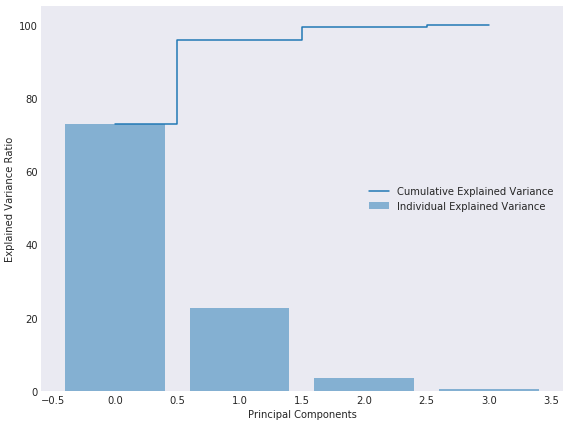

In [8]:
with plt.style.context('seaborn-dark'):
    plt.figure(figsize=(8, 6))

    plt.bar(range(4), var, alpha=0.5, align='center',
            label='Individual Explained Variance')
    plt.step(range(4), cum_var, where='mid',
             label='Cumulative Explained Variance')
    plt.ylabel('Explained Variance Ratio')
    plt.xlabel('Principal Components')
    plt.legend(loc='best')
    plt.tight_layout()

As we can see, in the above 95.8% of variance is associated with first two components, we can dropout the other two features with sacrificing too much accuracy.

### Creating Projection Matrix
we will create a matrix of concatenated top k Eigenvectors

In [9]:
projection_matrix = np.hstack((Eigen_pairs[0][1].reshape(4,1), Eigen_pairs[1][1].reshape(4,1)))
print(projection_matrix)

[[0.52106591 0.26934744]
 [0.37741762 0.92329566]
 [0.71956635 0.24438178]
 [0.26128628 0.12350962]]


In [10]:
Y = x_std.dot(projection_matrix)
print(Y.shape)

(150, 2)


### Plotting the iris species with 2 components

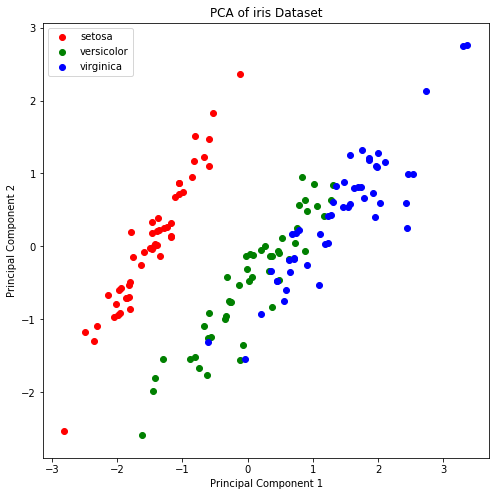

In [11]:
plt.figure(figsize=(8, 8))
target_names = iris['target_names']
y = iris['target']
for c, i, target_name in zip('rgb', [0,1,2], target_names):
    plt.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.title("PCA of iris Dataset")
plt.show()